# Introduction
Dans ce notebook, nous analysons les données historiques des Jeux Olympiques de 1896 à 2022, incluant les Jeux d’été et d’hiver. Les données proviennent du site officiel Olympics.com et ont été nettoyées puis regroupées dans un dataset final contenant, pour chaque pays et chaque édition des Jeux Olympiques, des informations sur les médailles remportées, le nombre d’athlètes, l’âge moyen des participants, les performances passées et le statut de pays hôte.

L’objectif principal de cette analyse est de comprendre les facteurs influençant le nombre de médailles remportées par un pays afin de préparer un modèle de prédiction du nombre total de médailles. Cette analyse exploratoire permettra d’identifier les variables les plus pertinentes et de mettre en évidence des tendances historiques.


# Présentation et Compréhension du Dataset:

 Le dataset utilisé dans cette analyse est le résultat de la fusion de plusieurs sources de données relatives aux Jeux Olympiques. Chaque ligne du dataset correspond à un pays participant à une édition donnée des Jeux Olympiques.

Le dataset contient des variables décrivant les performances sportives (nombre de médailles par type et total), les caractéristiques des athlètes (nombre d’athlètes et âge moyen), l’historique des performances passées (médailles cumulées avant chaque édition), ainsi que des informations contextuelles sur les Jeux Olympiques (année, saison et statut de pays hôte).

La variable cible principale de cette étude est le nombre total de médailles (total_medals), que nous chercherons à prédire. Les autres variables seront utilisées comme variables explicatives afin d’analyser leur influence sur les performances des pays.

##  Description des variables

- **total_medals :**  nombre total de médailles remportées par un pays lors d’une édition des Jeux Olympiques. Cette variable constitue la variable cible de notre étude.

- **gold_medals :**  nombre de médailles d’or remportées par un pays lors d’un JO.

- **silver_medals :**  nombre de médailles d’argent remportées par un pays lors d’un JO.

- **bronze_medals :** nombre de médailles de bronze remportées par un pays lors d’un JO.

- **total_athletes :** nombre total d’athlètes représentant un pays lors d’une édition des Jeux Olympiques.

- **avg_age_athletes :** âge moyen des athlètes d’un pays participant à un JO donné.

- **cumulative_medals :** nombre total de médailles remportées par un pays avant l’édition considérée. Cette variable permet de représenter l’expérience et les performances historiques du pays.

- **is_host :** variable binaire indiquant si le pays est le pays hôte de l’édition des Jeux Olympiques (1 = pays hôte, 0 = sinon).

- **year :** année de l’édition des Jeux Olympiques.

- **season :** saison des Jeux Olympiques (été ou hiver).

# Analyse Globale des Médailles aux Jeux Olympiques:

 L’objectif de cette section est d’analyser la répartition globale des médailles remportées par les pays aux Jeux Olympiques. Cette analyse permet de mieux comprendre la distribution de la variable cible total_medals et d’identifier les pays historiquement dominants.

 ## Analyse descriptive du nombre total de medailles

In [60]:
# telecharger le fichier
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# 2️⃣ Importer pandas
import pandas as pd

# 3️⃣ Définir le chemin de chaque fichier
path_results = '/content/drive/MyDrive/olympic_results_clean .csv'
path_athletes = '/content/drive/MyDrive/olympic_athletes_clean.csv'
path_hosts = '/content/drive/MyDrive/olympic_hosts_clean .csv'
path_medals = '/content/drive/MyDrive/medals_clean.csv'

# 4️⃣ Lire les fichiers
df_results = pd.read_csv(path_results)
df_athletes = pd.read_csv(path_athletes)
df_hosts = pd.read_csv(path_hosts)
df_medals = pd.read_csv(path_medals)

In [63]:
#analyse descriptive
df['total_medals'].describe()

,total_medals
count,2205.000000
mean,13.228118
std,22.058702
min,1.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,241.000000


La majorité des pays remportent peu de médailles : la médiane est de 6, le premier quartile à 2.
Quelques pays très performants remportent beaucoup plus de médailles (max = 241), ce qui montre une forte dispersion des résultats.
Cette distribution asymétrique souligne l’importance des performances passées et du nombre d’athlètes pour prédire les médailles.

## Distribution du nombre de medailles par pays

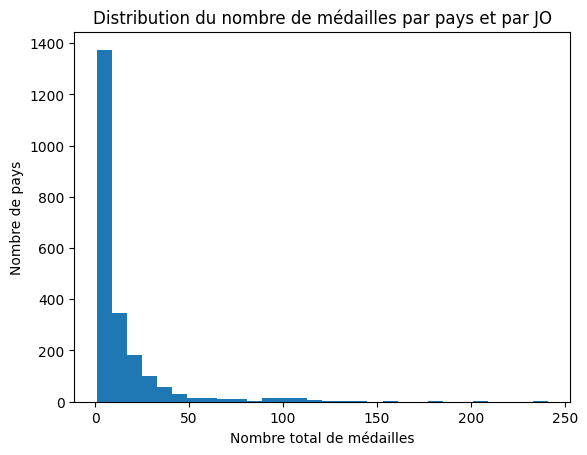

In [64]:
plt.figure()
plt.hist(df['total_medals'], bins=30)
plt.xlabel('Nombre total de médailles')
plt.ylabel('Nombre de pays')
plt.title('Distribution du nombre de médailles par pays et par JO')
plt.show()

L’histogramme montre que la majorité des pays remportent peu de médailles lors d’une édition des JO, tandis qu’un petit nombre de pays obtient un nombre élevé de médailles. Cela confirme la forte asymétrie dans la distribution des performances.

## Pays historiquement les plus medailles

In [65]:
top_countries = (
    df.groupby('country_3_letter_code_x')['total_medals']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_countries

,total_medals
country_3_letter_code_x,
USA,4657
URS,2441
GER,1615
FRA,1315
GBR,1267
ITA,1134
SWE,1097
GDR,1097
CHN,871


In [66]:
print(df.columns)

Index(['year', 'slug_game', 'country_3_letter_code_x', 'bronze_medals',
       'gold_medals', 'silver_medals', 'total_medals', 'total_athletes',
       'avg_age_athletes', 'medals_in_current_year', 'city', 'season',
       'game_name', 'cumulative_medals', 'is_host'],
      dtype='object')


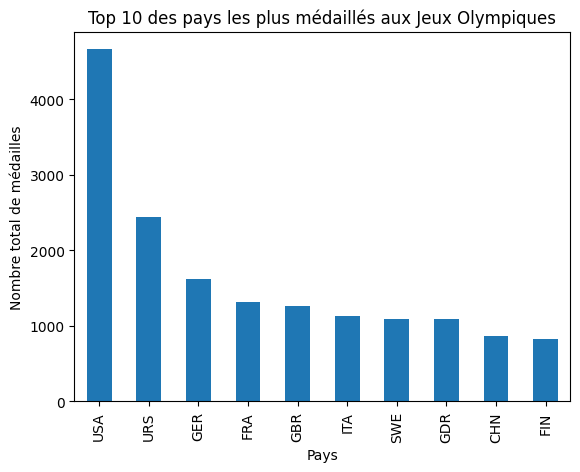

In [67]:
plt.figure()
top_countries.plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Nombre total de médailles')
plt.title('Top 10 des pays les plus médaillés aux Jeux Olympiques')
plt.show()

Le classement cumulatif des médailles montre que quelques pays dominent largement les Jeux Olympiques : les États-Unis (4657 médailles), l’URSS (2441) et l’Allemagne (1615) arrivent en tête, suivis par la France (1315) et le Royaume-Uni (1267). Cette concentration des médailles chez un petit groupe de nations souligne l’importance de l’historique des performances pour prédire les résultats futurs






#  4- Focus Pays : Analyse Détaillée de la France

## 4.1- Combien de médailles la France a remportées depuis 1896 ?

In [68]:
df_france = df[df['country_3_letter_code_x'] == 'FRA']

total_medals_france = df_france['total_medals'].sum()
gold_medals_france = df_france['gold_medals'].sum()
silver_medals_france = df_france['silver_medals'].sum()
bronze_medals_france = df_france['bronze_medals'].sum()

print("Total médailles France :", total_medals_france)
print("Médailles d'or :", gold_medals_france)
print("Médailles d'argent :", silver_medals_france)
print("Médailles de bronze :", bronze_medals_france)

Total médailles France : 1315
Médailles d'or : 394
Médailles d'argent : 415
Médailles de bronze : 506


Depuis le début des Jeux Olympiques en 1896, la France a remporté un total de 1315 médailles toutes disciplines confondues. La répartition par type de médaille montre que le pays a obtenu 394 médailles d’or, 415 médailles d’argent et 506 médailles de bronze. Ces chiffres montrent que la France a été régulièrement performante et compétitive au fil des éditions, avec une légère prédominance des médailles de bronze. Cette répartition fournit une base solide pour analyser plus en détail les performances par édition ou par discipline.

## 4.2- Lors de quelles JO la France a eu le plus / le moins de succès ?

In [69]:
france_by_game = df_france.groupby('slug_game').agg(
    total_medals=('total_medals', 'sum')
).reset_index()

max_medals = france_by_game['total_medals'].max()
min_medals = france_by_game['total_medals'].min()

edition_max = france_by_game[france_by_game['total_medals'] == max_medals]['slug_game'].values[0]
edition_min = france_by_game[france_by_game['total_medals'] == min_medals]['slug_game'].values[0]

print("Edition JO avec le plus de médailles :", edition_max, "(", max_medals, "médailles )")
print("Edition JO avec le moins de médailles :", edition_min, "(", min_medals, "médailles )")

Edition JO avec le plus de médailles : paris-1900 ( 103 médailles )
Edition JO avec le moins de médailles : st-louis-1904 ( 1 médailles )


L’analyse par édition montre que la France a obtenu son meilleur résultat aux Jeux de Paris en 1900, avec 103 médailles, tandis que sa performance la plus faible a eu lieu aux Jeux de Saint-Louis en 1904, avec seulement 1 médaille. Cette variation importante reflète non seulement l’évolution historique du pays dans le contexte olympique, mais aussi l’influence des éditions locales et de la participation internationale sur les performances. On observe ainsi que certains Jeux ont fortement favorisé la France, notamment ceux organisés sur son sol.

## 4.3- Évolution des performances de la France dans le temps

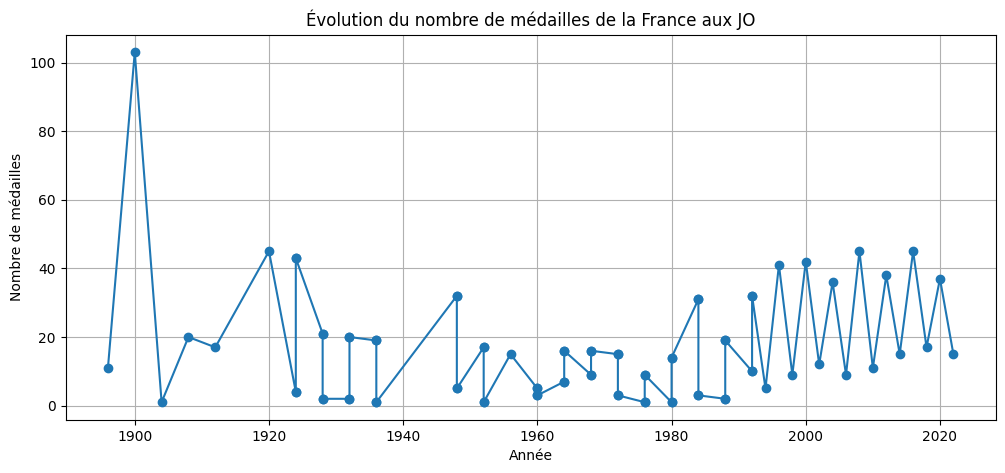

In [70]:
import matplotlib.pyplot as plt

df_france_sorted = df_france.sort_values('year')

plt.figure(figsize=(12,5))
plt.plot(df_france_sorted['year'], df_france_sorted['total_medals'], marker='o', linestyle='-')
plt.title("Évolution du nombre de médailles de la France aux JO")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.grid(True)
plt.show()

Le graphique montre l’évolution des médailles françaises au fil du temps. On observe des périodes de domination, avec un nombre élevé de médailles lors de certaines éditions, et des creux correspondant à des années moins fructueuses. Cette visualisation permet de détecter les tendances à long terme et d’identifier les éditions où la France a particulièrement performé.

## 4.4- La France et sa spécialisation par discipline

Identifier si la France est particulièrement performante dans certaines disciplines par rapport aux autres pays, et voir dans quels sports elle excelle historiquement.

In [71]:
# On garde uniquement les colonnes nécessaires de df_results pour la fusion
df_results_subset = df_results[['year', 'slug_game', 'country_3_letter_code', 'discipline_title', 'medal_type']]

# On fait une fusion 'left' avec df pour ajouter discipline_title et medal_type
df_extended = df.merge(
    df_results_subset,
    left_on=['year', 'slug_game', 'country_3_letter_code_x'],
    right_on=['year', 'slug_game', 'country_3_letter_code'],
    how='left'
)

# Vérification
print(df_extended[['year','slug_game','country_3_letter_code_x','discipline_title','medal_type']].head())

   year     slug_game country_3_letter_code_x discipline_title medal_type
0  2008  beijing-2008                     AFG        Taekwondo        NaN
1  2008  beijing-2008                     AFG        Taekwondo     BRONZE
2  2012   london-2012                     AFG           Boxing        NaN
3  2012   london-2012                     AFG             Judo        NaN
4  2012   london-2012                     AFG        Taekwondo        NaN


In [72]:

df_france_disciplines = df_extended[df_extended['country_3_letter_code'] == 'FRA']

# Groupement par discipline
france_disciplines = df_france_disciplines.groupby('discipline_title').agg(
    total_medals=('medal_type', lambda x: x.notna().sum()),
    gold_medals=('medal_type', lambda x: (x=='GOLD').sum()),
    silver_medals=('medal_type', lambda x: (x=='SILVER').sum()),
    bronze_medals=('medal_type', lambda x: (x=='BRONZE').sum())
).sort_values('total_medals', ascending=False).reset_index()

print(france_disciplines.head(10))

  discipline_title  total_medals  gold_medals  silver_medals  bronze_medals
0          Fencing           181           67             61             53
1        Athletics           103           20             37             46
2    Cycling Track            94           40             26             28
3    Alpine Skiing            86           27             28             31
4             Judo            77           21             16             40
5          Sailing            59           22             15             22
6         Swimming            58            9             20             29
7           Rowing            47            9             22             16
8         Shooting            38           11             17             10
9         Biathlon            33           13              9             11


L’analyse des médailles par discipline révèle que la France excelle particulièrement dans certaines disciplines. L’escrime arrive en tête avec 181 médailles (dont 67 en or), suivie de l’athlétisme (103 médailles) et du cyclisme sur piste (94 médailles). Ces chiffres montrent une spécialisation historique et une maîtrise dans ces sports, avec une proportion importante de médailles d’or, notamment en escrime et cyclisme. D’autres disciplines comme le judo, la voile et la natation montrent également des performances solides, tandis que certaines disciplines hivernales comme le ski alpin et le biathlon contribuent également au palmarès.

Cette répartition souligne que la France a développé une expertise ciblée dans certains sports, ce qui peut être un indicateur pertinent pour prédire ses performances futures dans ces disciplines lors des Jeux Olympiques.

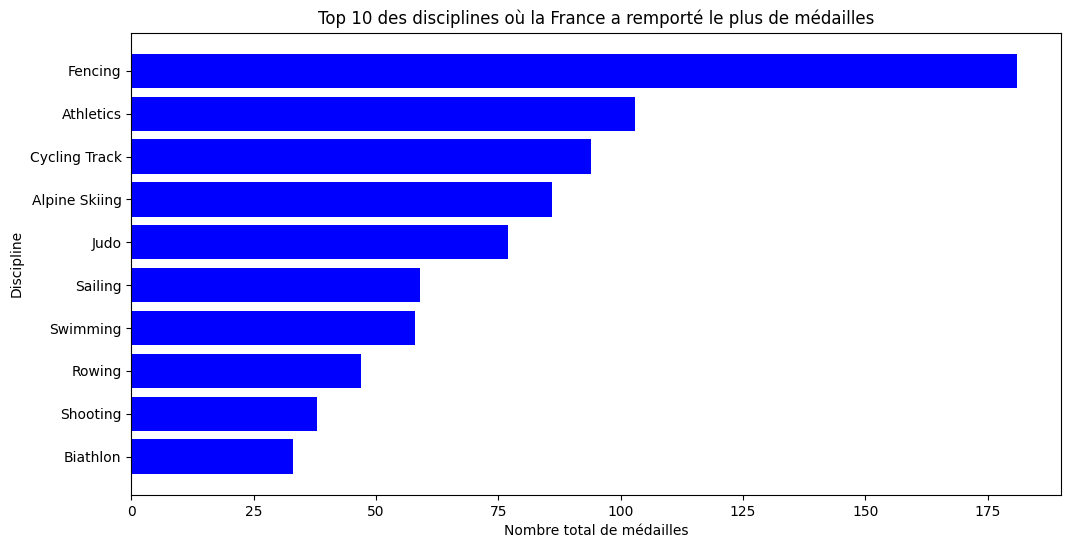

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(france_disciplines['discipline_title'].head(10)[::-1],
         france_disciplines['total_medals'].head(10)[::-1],
         color='blue')
plt.title("Top 10 des disciplines où la France a remporté le plus de médailles")
plt.xlabel("Nombre total de médailles")
plt.ylabel("Discipline")
plt.show()

L’analyse des médailles par discipline révèle que la France excelle particulièrement dans certaines disciplines. L’escrime arrive en tête avec 181 médailles (dont 67 en or), suivie de l’athlétisme (103 médailles) et du cyclisme sur piste (94 médailles). Ces chiffres montrent une spécialisation historique et une maîtrise dans ces sports, avec une proportion importante de médailles d’or, notamment en escrime et cyclisme. D’autres disciplines comme le judo, la voile et la natation montrent également des performances solides, tandis que certaines disciplines hivernales comme le ski alpin et le biathlon contribuent également au palmarès.

Cette répartition souligne que la France a développé une expertise ciblée dans certains sports, ce qui peut être un indicateur pertinent pour prédire ses performances futures dans ces disciplines lors des Jeux Olympiques.

# 5- Analyse Comparative par discipline

## 5.1- Top discipline par pays

Identifier quelle discipline rapporte le plus de medailles pour tous les pays et voir les tendances globales

In [74]:
top_disciplines = df_results.groupby('discipline_title').agg(
    total_medals=('medal_type', 'count'),
    gold_medals=('medal_type', lambda x: (x == 'GOLD').sum()),
    silver_medals=('medal_type', lambda x: (x == 'SILVER').sum()),
    bronze_medals=('medal_type', lambda x: (x == 'BRONZE').sum())
).sort_values('total_medals', ascending=False).reset_index()

print(top_disciplines.head(10))

      discipline_title  total_medals  gold_medals  silver_medals  \
0            Athletics          3079         1027           1029   
1             Swimming          1763          589            587   
2            Wrestling          1356          428            428   
3               Boxing           996          265            265   
4  Gymnastics Artistic           978          338            319   
5             Shooting           861          287            288   
6               Rowing           809          268            268   
7        Weightlifting           679          228            225   
8              Fencing           668          223            223   
9        Speed skating           611          204            207   

   bronze_medals  
0           1023  
1            587  
2            500  
3            466  
4            321  
5            286  
6            273  
7            226  
8            222  
9            200  


Ces résultats confirment que l'Athlétisme, la Natation et la Lutte sont historiquement les disciplines qui rapportent le plus grand nombre de médailles aux Jeux Olympiques, soulignant leur rôle central dans le palmarès global.

## 5.2- Comparaison FR avec autre pays dans les top discipline

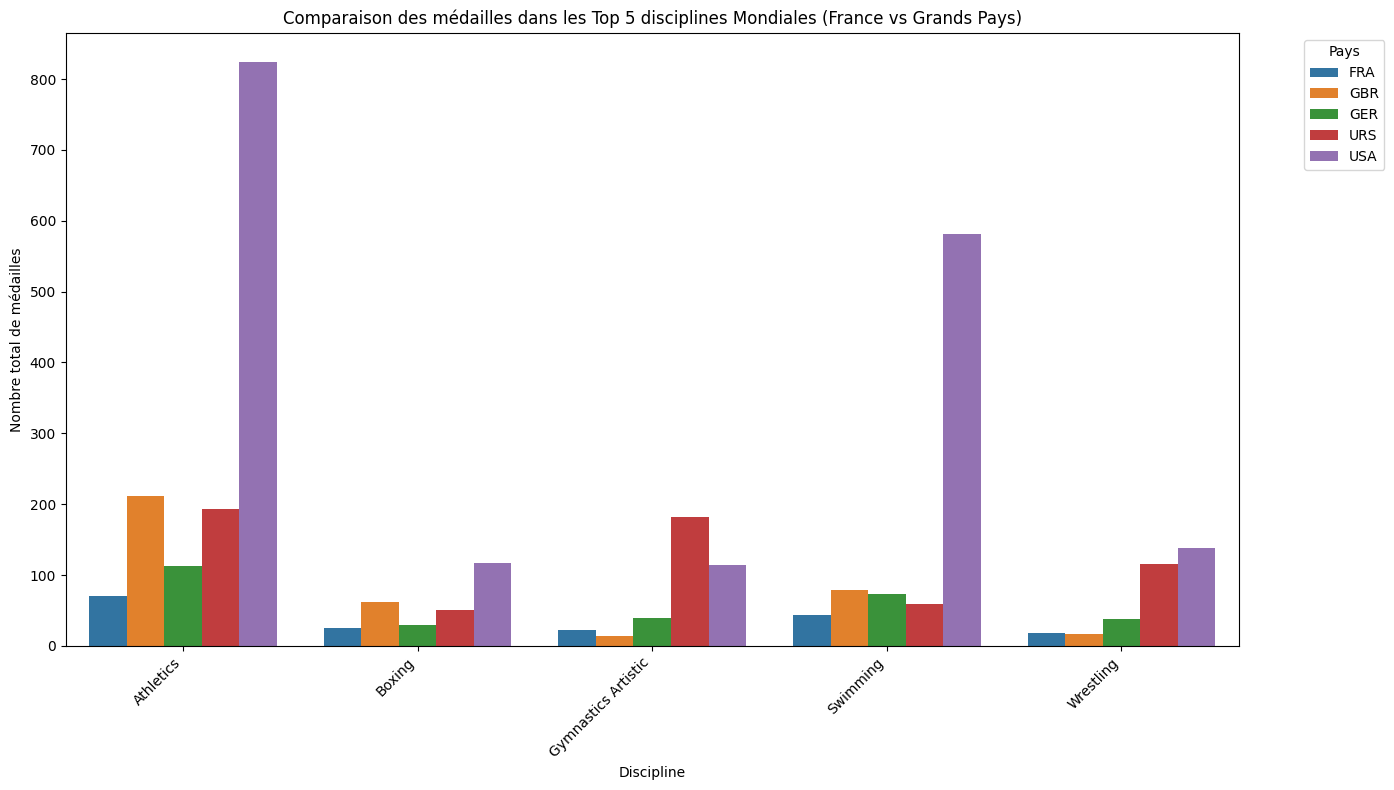

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-calculer le DataFrame top_disciplines global au cas où il aurait été perdu ou modifié
top_disciplines = df_results.groupby('discipline_title').agg(
    total_medals=('medal_type', 'count'),
    gold_medals=('medal_type', lambda x: (x == 'GOLD').sum()),
    silver_medals=('medal_type', lambda x: (x == 'SILVER').sum()),
    bronze_medals=('medal_type', lambda x: (x == 'BRONZE').sum())
).sort_values('total_medals', ascending=False).reset_index()

# Get the top 5 global disciplines by total medals (from the 'top_disciplines' DataFrame calculated earlier)
global_top5_disciplines = top_disciplines.head(5)['discipline_title'].tolist()

# Select a few major countries for comparison, including France
# Using 'top_countries' series from earlier to pick some top overall medal winners
countries_for_comparison = ['FRA'] + top_countries.drop('FRA').head(4).index.tolist()

# Filter df_results for these disciplines and countries
comparison_data = df_results[
    (df_results['discipline_title'].isin(global_top5_disciplines)) &
    (df_results['country_3_letter_code'].isin(countries_for_comparison))
]

# Calculate total medals for these filtered data
medals_comparison = comparison_data.groupby(['discipline_title', 'country_3_letter_code']).agg(
    total_medals=('medal_type', 'count')
).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    data=medals_comparison,
    x='discipline_title',
    y='total_medals',
    hue='country_3_letter_code',
    palette='tab10' # Using a different palette for clarity
)
plt.title("Comparaison des médailles dans les Top 5 disciplines Mondiales (France vs Grands Pays)")
plt.xlabel("Discipline")
plt.ylabel("Nombre total de médailles")
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Ce graphique souligne que, bien que la France soit une nation olympique respectée, elle ne figure pas parmi les nations les plus dominantes dans les sports qui distribuent le plus grand nombre de médailles à l'échelle mondiale. Cela renforce l'idée d'une spécialisation française dans certaines disciplines, qui ne sont pas toujours les plus prolifiques en termes de médailles globales.

# Evolution des medailles pour les top 5 sport

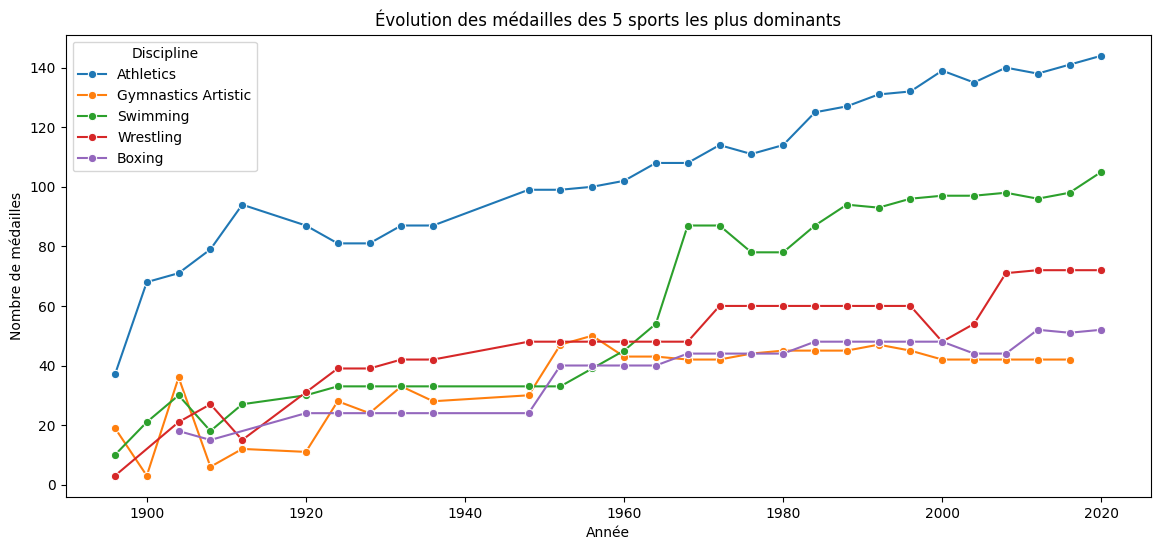

In [76]:
# Médailles par discipline et par année
medals_by_year_sport = df_results.groupby(['year', 'discipline_title']).agg(
    total_medals=('medal_type', 'count')
).reset_index()

# Graphique : Top 5 sports les plus médaillés (en utilisant 'top_disciplines' précédemment calculé)
top5_sports = top_disciplines.head(5)['discipline_title'].tolist()
medals_top5 = medals_by_year_sport[medals_by_year_sport['discipline_title'].isin(top5_sports)]

plt.figure(figsize=(14,6))
sns.lineplot(
    data=medals_top5,
    x='year',
    y='total_medals',
    hue='discipline_title',
    marker='o'
)
plt.title("Évolution des médailles des 5 sports les plus dominants")
plt.ylabel("Nombre de médailles")
plt.xlabel("Année")
plt.legend(title='Discipline')
plt.show()

Ce graphique met en évidence les dynamiques à long terme des 5 sports mondiaux les plus médaillés. On peut y observer des périodes de forte affluence de médailles, notamment pour l'athlétisme et la natation, ainsi que les évolutions de popularité et de distribution des médailles au fil des éditions olympiques pour la lutte, la boxe et la gymnastique artistique. Cela souligne l'importance historique et continue de ces disciplines dans le palmarès global des Jeux.

# Top 10 disciplines par medailles cumulees

/tmp/ipython-input-443791308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


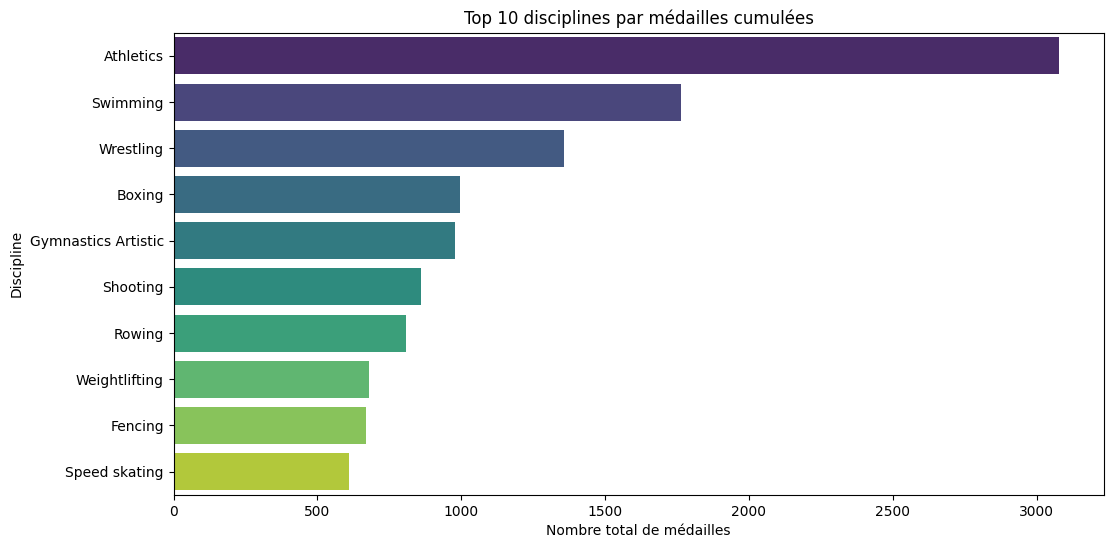

In [77]:
# Médailles cumulées par discipline (en utilisant top_disciplines)
top_disciplines['cumulative_medals'] = top_disciplines['total_medals'].cumsum()

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_disciplines.head(10),
    x='total_medals',
    y='discipline_title',
    palette='viridis'
)
plt.title("Top 10 disciplines par médailles cumulées")
plt.xlabel("Nombre total de médailles")
plt.ylabel("Discipline")
plt.show()

# Comparaison JO d'ete et hiver

/tmp/ipython-input-3574115089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medals_season, x='season', y='total_medals_season', palette='coolwarm')


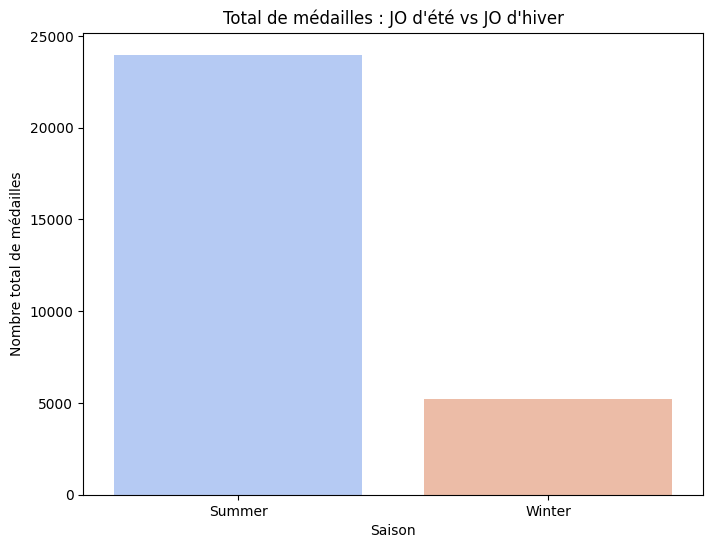

In [78]:
medals_season = df.groupby('season').agg(
    total_medals_season=('total_medals', 'sum')
).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=medals_season, x='season', y='total_medals_season', palette='coolwarm')
plt.title("Total de médailles : JO d'été vs JO d'hiver")
plt.ylabel("Nombre total de médailles")
plt.xlabel("Saison")
plt.show()

Ce graphique révèle une différence significative dans le nombre total de médailles attribuées entre les Jeux Olympiques d'été et d'hiver. Les JO d'été, avec leur plus grand nombre de disciplines et d'épreuves, distribuent un volume de médailles bien supérieur à celui des JO d'hiver. Cela souligne la plus grande ampleur et diversité des compétitions estivales dans l'histoire olympique.

# Evaluation des medails cumules ppar pays

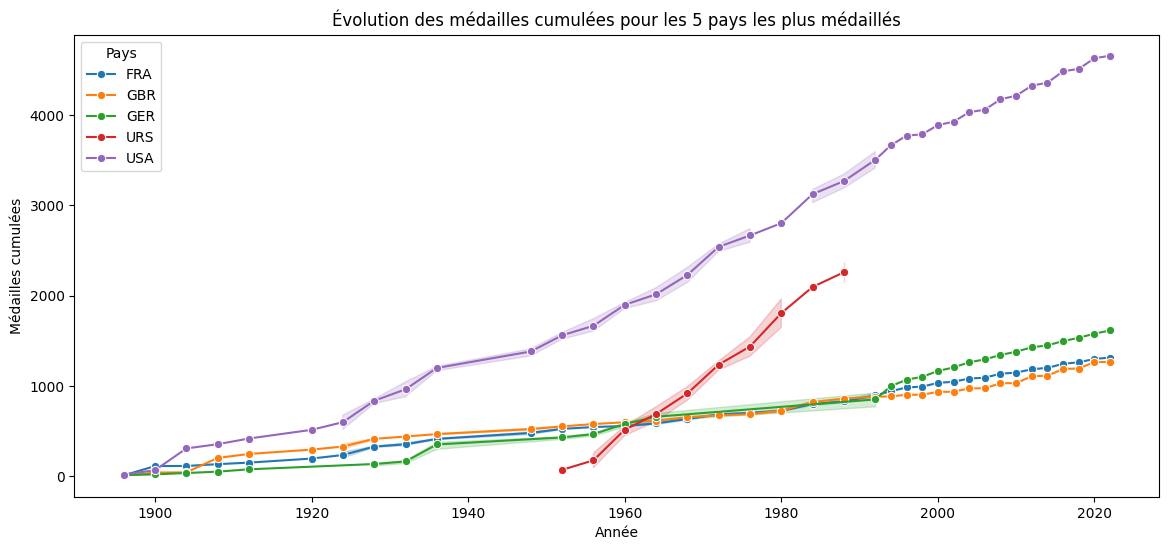

In [79]:
# Médailles cumulées par pays
df['cumulative_medals_country'] = df.groupby('country_3_letter_code_x')['total_medals'].cumsum()

# Exemple pour les 5 pays les plus médaillés
top5_countries = df.groupby('country_3_letter_code_x')['cumulative_medals_country'].max().nlargest(5).index.tolist()
cumulative_top5 = df[df['country_3_letter_code_x'].isin(top5_countries)]

plt.figure(figsize=(14,6))
sns.lineplot(
    data=cumulative_top5,
    x='year',
    y='cumulative_medals_country',
    hue='country_3_letter_code_x',
    marker='o'
)
plt.title("Évolution des médailles cumulées pour les 5 pays les plus médaillés")
plt.ylabel("Médailles cumulées")
plt.xlabel("Année")
plt.legend(title="Pays")
plt.show()

Ce graphique retrace l'histoire olympique des cinq nations les plus médaillées en termes d'accumulation de médailles au fil des ans. On peut observer plusieurs dynamiques :

*   **Dominance des États-Unis (USA) :** Leur courbe montre une croissance quasi constante et très prononcée, soulignant une performance exceptionnelle et durable sur l'ensemble de la période, ce qui en fait la nation olympique la plus dominante historiquement.
*   **L'impact de l'histoire (URSS) :** La courbe de l'URSS (URS) présente une montée très rapide et spectaculaire durant son existence, illustrant une période de forte concentration de performances. On observe ensuite une stabilisation après sa dissolution, indiquant la fin de cette entité sportive collective.
*   **Performance constante de l'Allemagne (GER) :** L'Allemagne montre une progression solide, bien que moins fulgurante que l'URSS, témoignant d'une présence constante et performante à travers les décennies.
*   **Croissance stable de la France (FRA) et du Royaume-Uni (GBR) :** Ces deux nations affichent des trajectoires de croissance plus régulières et progressives, signe d'une participation et d'une performance soutenues, même si elles accumulent les médailles à un rythme plus modéré que les leaders absolus.

En somme, ce graphique illustre non seulement la hiérarchie des nations olympiques en termes de médailles, mais aussi comment les événements historiques et les stratégies sportives nationales se reflètent dans l'accumulation de succès au fil du temps.



# Impact du nombre d'atheltes

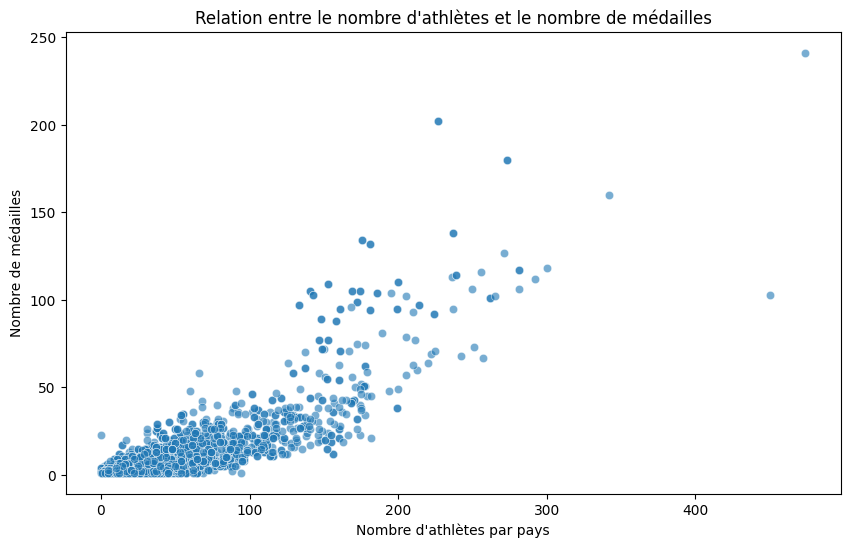

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_athletes', y='total_medals', alpha=0.6)
plt.title("Relation entre le nombre d'athlètes et le nombre de médailles")
plt.xlabel("Nombre d'athlètes par pays")
plt.ylabel("Nombre de médailles")
plt.show()

Ce graphique montre clairement une **corrélation positive** entre le nombre total d'athlètes qu'un pays envoie aux Jeux Olympiques et le nombre total de médailles qu'il remporte. Plus un pays participe avec un grand nombre d'athlètes, plus il a de chances de gagner un nombre élevé de médailles.

# Impact des performances passées (cumulative_medals)

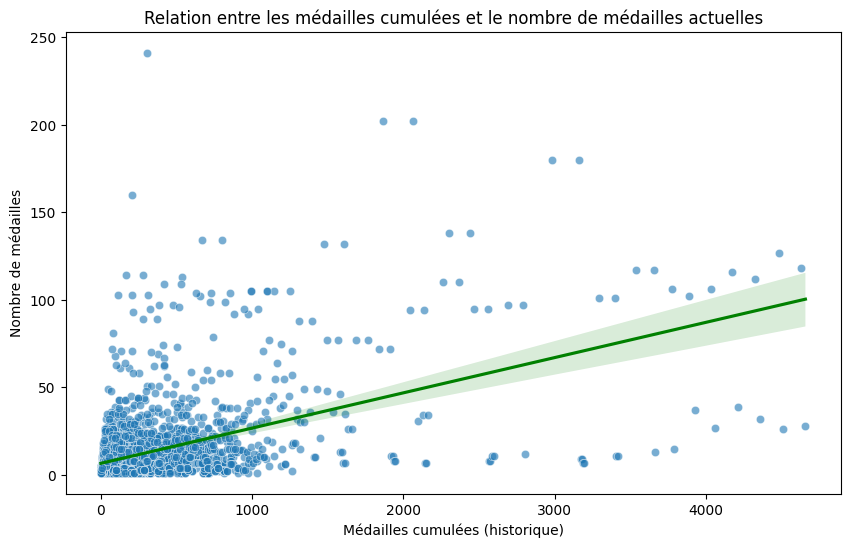

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='cumulative_medals_country', y='total_medals', alpha=0.6)
sns.regplot(data=df, x='cumulative_medals_country', y='total_medals', scatter=False, color='green')
plt.title("Relation entre les médailles cumulées et le nombre de médailles actuelles")
plt.xlabel("Médailles cumulées (historique)")
plt.ylabel("Nombre de médailles")
plt.show()

### Explication du graphique: Relation entre les médailles cumulées et le nombre de médailles actuelles

Ce graphique représente la relation entre le nombre de médailles cumulées (historique) qu'un pays a remportées avant une édition des JO donnée et le nombre de médailles qu'il a gagnées lors de cette édition spécifique.

**Observations Clés :**

*   **Corrélation Positive Claire :** Le nuage de points, ainsi que la ligne de régression verte, montrent une **forte corrélation positive**. Cela signifie que les pays qui ont un historique riche en médailles (un grand nombre de médailles cumulées) ont une tendance marquée à remporter un nombre élevé de médailles lors des éditions actuelles des Jeux Olympiques.
*   **L'Effet de la Continuité :** Ce résultat suggère que le succès appelle le succès. Les nations avec une forte tradition olympique, des infrastructures sportives établies, des programmes de développement des athlètes et une expertise accumulée au fil du temps continuent de performer à un niveau élevé.
*   **Importance du Passé pour le Futur :** Pour un modèle de prédiction du nombre de médailles, la variable des médailles cumulées est un indicateur extrêmement puissant. Elle capte l'expérience, la stabilité et les capacités sportives d'un pays sur le long terme.

**En résumé :** La performance historique d'un pays, mesurée par ses médailles cumulées, est un facteur prédictif majeur de son succès aux Jeux Olympiques futurs. Les pays qui ont un passé glorieux ont un avantage significatif pour continuer à accumuler des médailles.

# Impact de l’âge moyen des athlètes

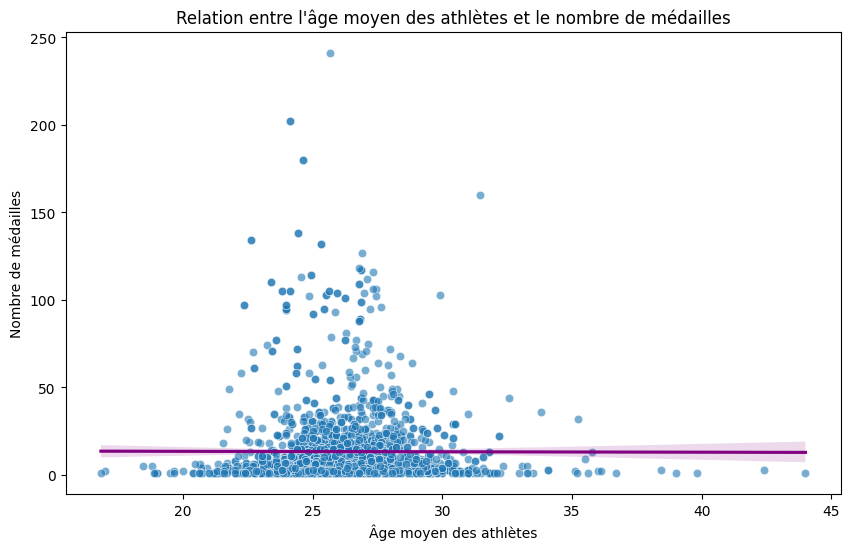

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_age_athletes', y='total_medals', alpha=0.6)
sns.regplot(data=df, x='avg_age_athletes', y='total_medals', scatter=False, color='purple')
plt.title("Relation entre l'âge moyen des athlètes et le nombre de médailles")
plt.xlabel("Âge moyen des athlètes")
plt.ylabel("Nombre de médailles")
plt.show()

In [83]:
correlation = df['avg_age_athletes'].corr(df['total_medals'])
print(f"Le coefficient de corrélation de Pearson entre l'âge moyen des athlètes et le nombre total de médailles est : {correlation:.2f}")

Le coefficient de corrélation de Pearson entre l'âge moyen des athlètes et le nombre total de médailles est : -0.00


1. **Visuellement (Graphique) :** Le nuage de points apparaît très dispersé, sans qu'une direction claire (ascendante ou descendante) ne se dégage de manière prononcée. La ligne de régression violette est quasiment horizontale, ou très légèrement inclinée, ce qui indique visuellement une absence de tendance forte.


2.  **Quantitativement (Coefficient de corrélation) :** Le calcul du coefficient de corrélation de Pearson a donné une valeur de **-0.00**. Cette valeur est extrêmement proche de zéro.



Les deux analyses (visuelle et quantitative) convergent vers la même conclusion : il n'y a **pas de relation linéaire significative ou forte** entre l'âge moyen des athlètes d'un pays et le nombre total de médailles qu'il remporte aux Jeux Olympiques. En d'autres termes, un pays dont les athlètes ont un âge moyen plus élevé ou plus faible n'est pas, de manière prévisible, plus ou moins performant en termes de médailles en raison de cet âge. D'autres facteurs semblent jouer un rôle beaucoup plus important dans la détermination du succès olympique.

# matrice de correlations

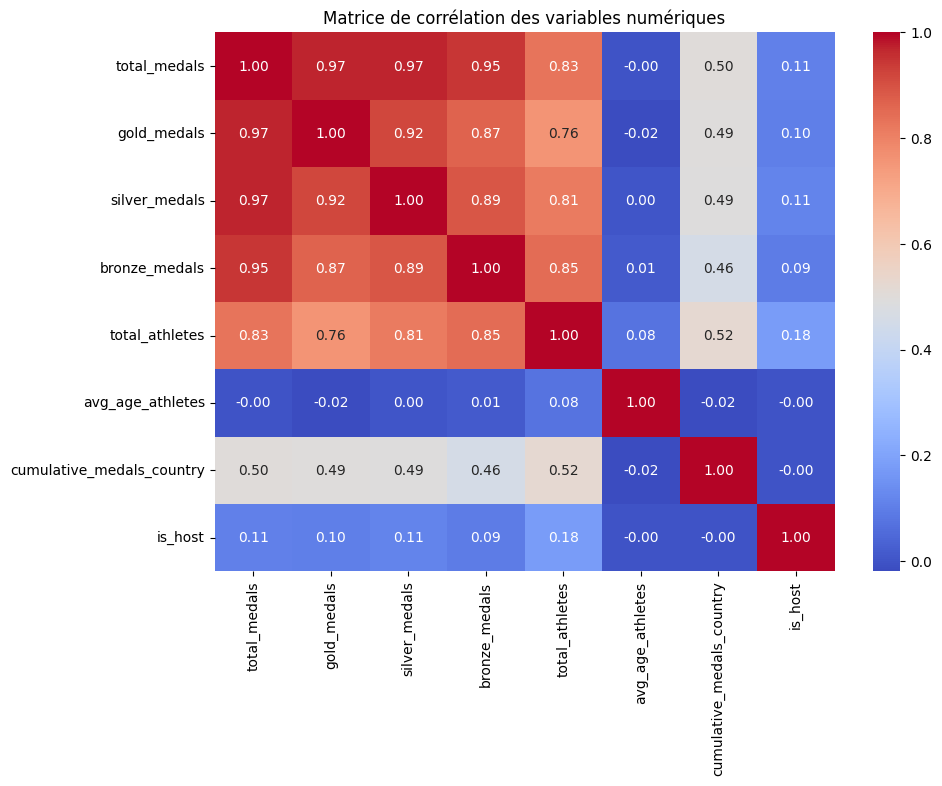

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des variables numériques à analyser
numeric_features = [
    'total_medals', 'gold_medals', 'silver_medals', 'bronze_medals',
    'total_athletes', 'avg_age_athletes', 'cumulative_medals_country', 'is_host'
]

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

La matrice de corrélation confirme plusieurs points clés :
*   Il existe de très fortes corrélations positives entre les différents types de médailles (or, argent, bronze) et le nombre total de médailles, ce qui est logique.
*   Le nombre total d'athlètes (`total_athletes`) et les médailles cumulées (`cumulative_medals_country`) sont fortement et positivement corrélés avec le nombre total de médailles (`total_medals`), ce qui en fait des facteurs explicatifs importants.
*   En revanche, l'âge moyen des athlètes (`avg_age_athletes`) et le statut de pays hôte (`is_host`) montrent des corrélations très faibles, voire négligeables, avec le nombre total de médailles. Cela suggère que ces deux variables ont un impact limité, voire non linéaire, sur la performance globale en médailles.